In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("health_armaan.csv", parse_dates=["date"]).sort_values("date").reset_index(drop=True)

df["year_month"] = df["date"].dt.to_period("M")
iso = df["date"].dt.isocalendar()
df["_iso_year"] = iso.year.astype(int)
df["_iso_week"] = iso.week.astype(int)

sum_like = [
    "StepCount","ActiveEnergyBurned","BasalEnergyBurned",
    "AppleExerciseTime","AppleStandTime","AppleStandHour",
    "FlightsClimbed","DistanceWalkingRunning","DistanceCycling"
]
af = df.copy()
for c in sum_like:
    if c in af.columns:
        af[c] = af[c].fillna(0.0)

print(len(df))


1096


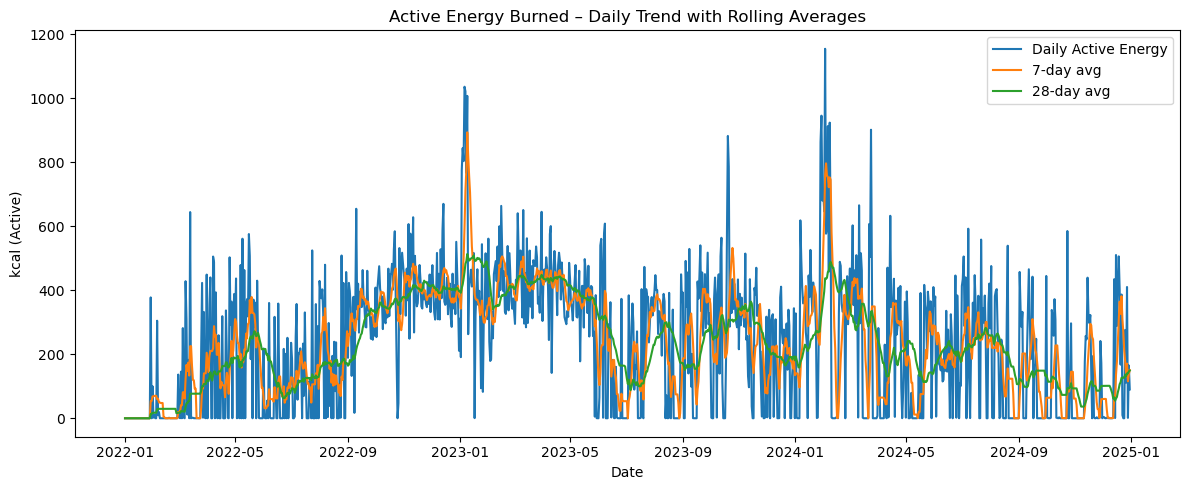

In [3]:
tmp = af[["date","ActiveEnergyBurned"]].copy()
tmp["roll7"] = tmp["ActiveEnergyBurned"].rolling(7, min_periods=1).mean()
tmp["roll28"] = tmp["ActiveEnergyBurned"].rolling(28, min_periods=1).mean()

plt.figure(figsize=(12,5))
plt.plot(tmp["date"], tmp["ActiveEnergyBurned"], label="Daily Active Energy")
plt.plot(tmp["date"], tmp["roll7"], label="7-day avg")
plt.plot(tmp["date"], tmp["roll28"], label="28-day avg")
plt.title("Active Energy Burned – Daily Trend with Rolling Averages")
plt.xlabel("Date"); plt.ylabel("kcal (Active)"); plt.legend()
plt.tight_layout(); plt.show()


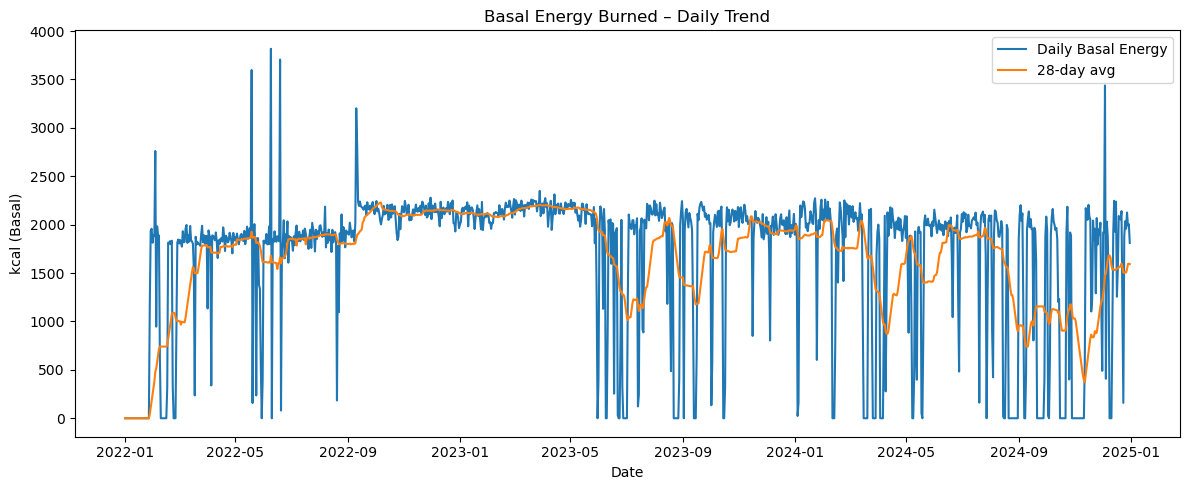

In [4]:
tmp = af[["date","BasalEnergyBurned"]].copy()
tmp["roll28"] = tmp["BasalEnergyBurned"].rolling(28, min_periods=1).mean()

plt.figure(figsize=(12,5))
plt.plot(tmp["date"], tmp["BasalEnergyBurned"], label="Daily Basal Energy")
plt.plot(tmp["date"], tmp["roll28"], label="28-day avg")
plt.title("Basal Energy Burned – Daily Trend")
plt.xlabel("Date"); plt.ylabel("kcal (Basal)"); plt.legend()
plt.tight_layout(); plt.show()


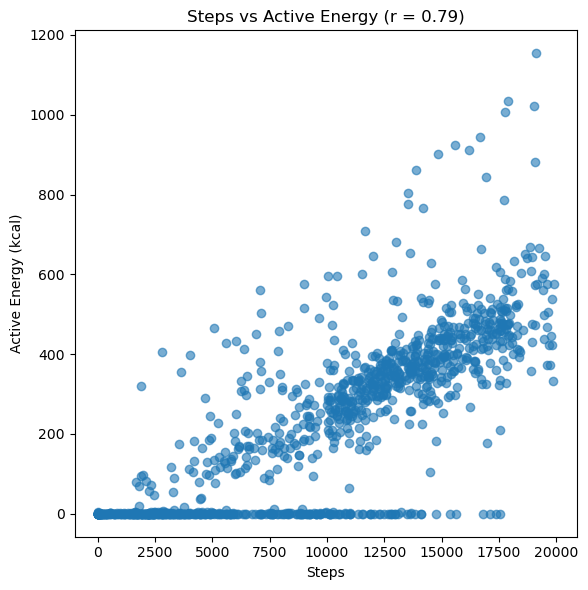

In [5]:
mask = df["StepCount"].notna() & df["ActiveEnergyBurned"].notna()
r = np.corrcoef(df.loc[mask,"StepCount"], df.loc[mask,"ActiveEnergyBurned"])[0,1]
plt.figure(figsize=(6,6))
plt.scatter(df.loc[mask,"StepCount"], df.loc[mask,"ActiveEnergyBurned"], alpha=0.6)
plt.title(f"Steps vs Active Energy (r = {r:.2f})")
plt.xlabel("Steps"); plt.ylabel("Active Energy (kcal)")
plt.tight_layout(); plt.show()


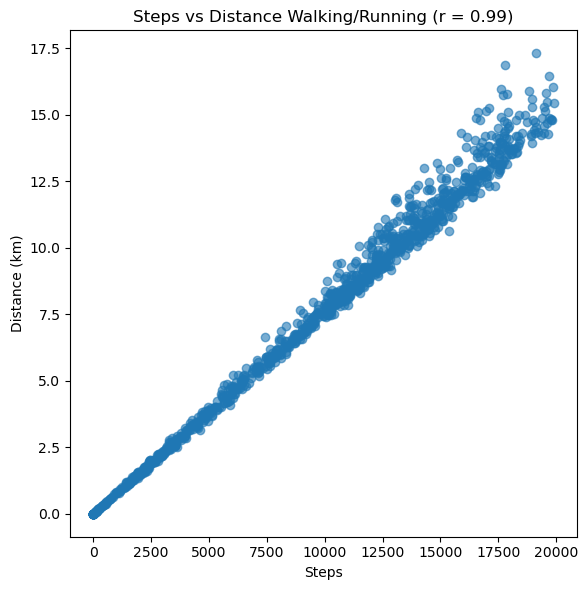

In [6]:
mask = df["StepCount"].notna() & df["DistanceWalkingRunning"].notna()
r = np.corrcoef(df.loc[mask,"StepCount"], df.loc[mask,"DistanceWalkingRunning"])[0,1]
plt.figure(figsize=(6,6))
plt.scatter(df.loc[mask,"StepCount"], df.loc[mask,"DistanceWalkingRunning"], alpha=0.6)
plt.title(f"Steps vs Distance Walking/Running (r = {r:.2f})")
plt.xlabel("Steps"); plt.ylabel("Distance (km)")
plt.tight_layout(); plt.show()


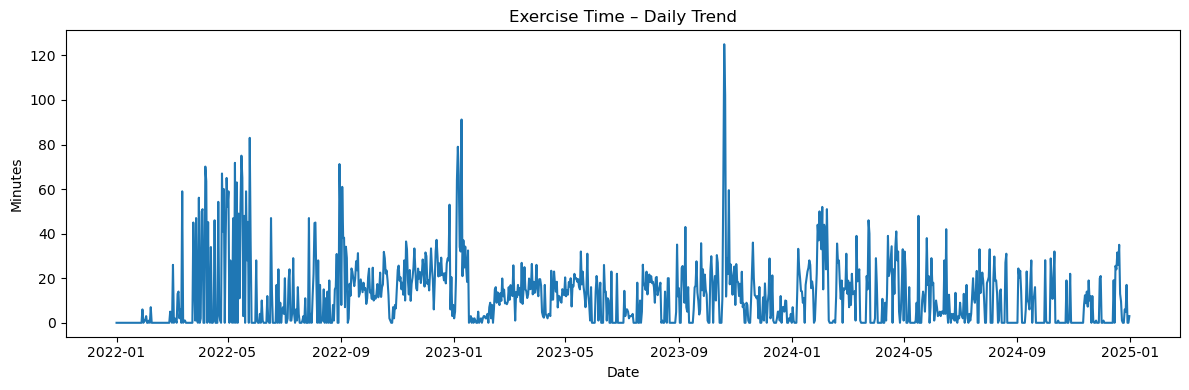

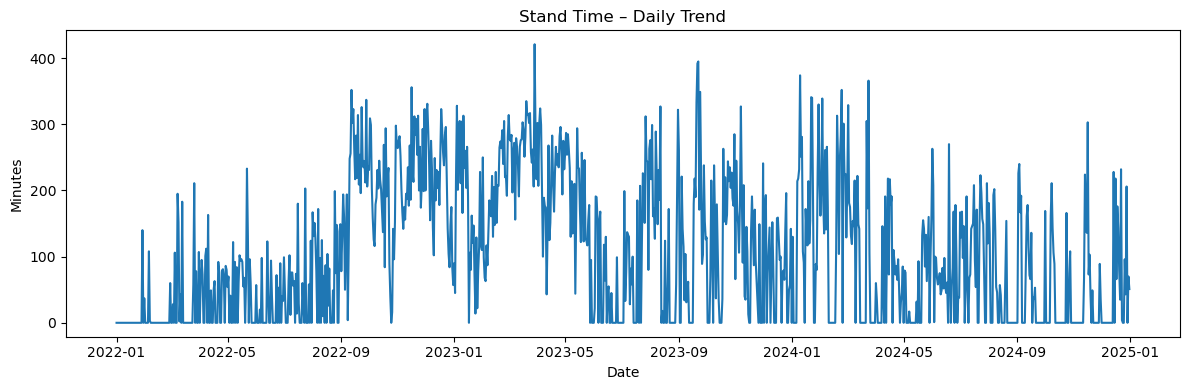

In [8]:
plt.figure(figsize=(12,4))
plt.plot(af["date"], af["AppleExerciseTime"])
plt.title("Exercise Time – Daily Trend")
plt.xlabel("Date"); plt.ylabel("Minutes")
plt.tight_layout(); plt.show()

plt.figure(figsize=(12,4))
plt.plot(af["date"], af["AppleStandTime"])
plt.title("Stand Time – Daily Trend")
plt.xlabel("Date"); plt.ylabel("Minutes")
plt.tight_layout(); plt.show()


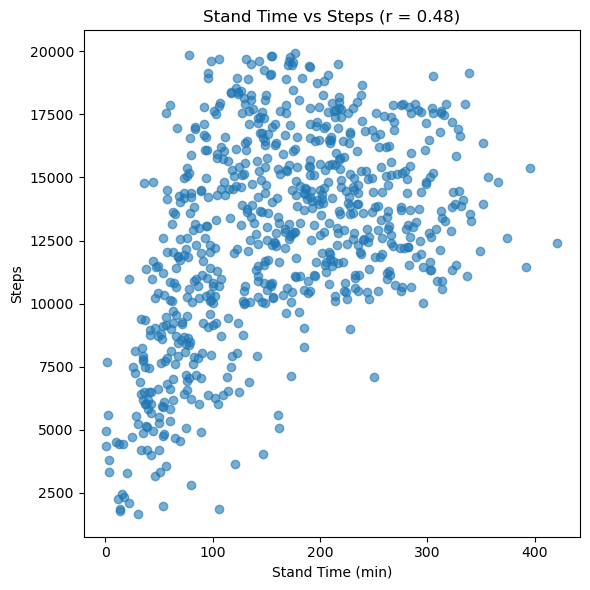

In [10]:

# Stand vs Steps
mask = df["AppleStandTime"].notna() & df["StepCount"].notna()
r2 = np.corrcoef(df.loc[mask,"AppleStandTime"], df.loc[mask,"StepCount"])[0,1]
plt.figure(figsize=(6,6))
plt.scatter(df.loc[mask,"AppleStandTime"], df.loc[mask,"StepCount"], alpha=0.6)
plt.title(f"Stand Time vs Steps (r = {r2:.2f})")
plt.xlabel("Stand Time (min)"); plt.ylabel("Steps")
plt.tight_layout(); plt.show()


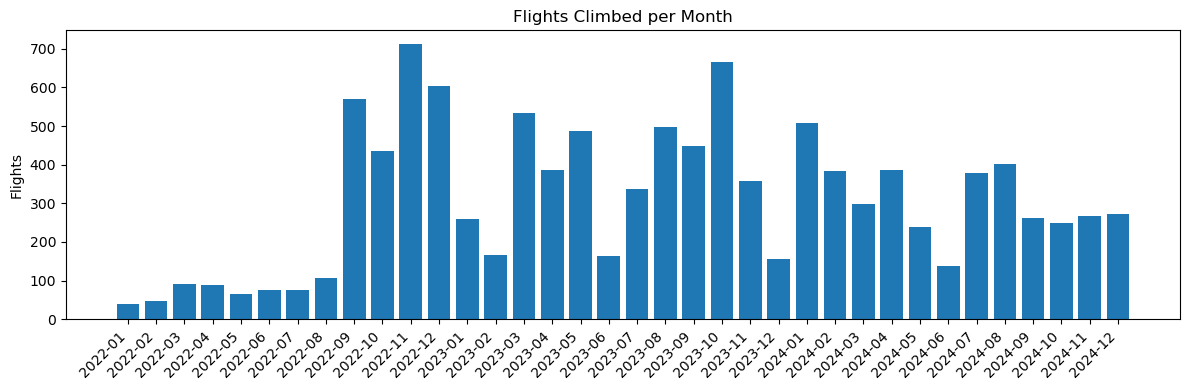

In [11]:
m = (
    af.groupby("year_month")["FlightsClimbed"]
      .sum()
      .reset_index()
      .sort_values("year_month")
)

plt.figure(figsize=(12,4))
plt.bar(m["year_month"].astype(str), m["FlightsClimbed"])
plt.xticks(rotation=45, ha="right")
plt.title("Flights Climbed per Month")
plt.ylabel("Flights")
plt.tight_layout(); plt.show()


In [14]:

top_days = df.loc[df["DistanceCycling"].fillna(0) > 0, ["date","DistanceCycling"]] \
             .sort_values("DistanceCycling", ascending=False) \
             .head(10)
top_days

,date,DistanceCycling
836,2024-04-16,0.608466


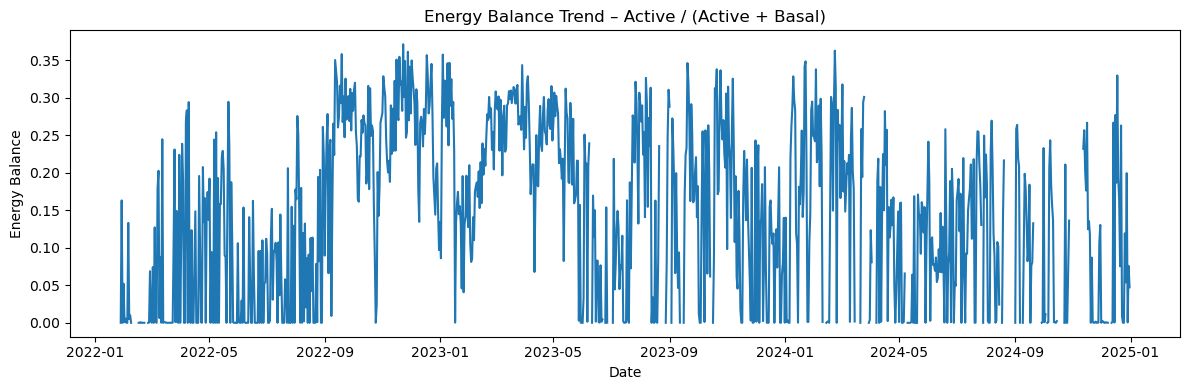

In [16]:
plt.figure(figsize=(12,4))
plt.plot(df["date"], df["EnergyBalance"])
plt.title("Energy Balance Trend – Active / (Active + Basal)")
plt.xlabel("Date"); plt.ylabel("Energy Balance")
plt.tight_layout(); plt.show()



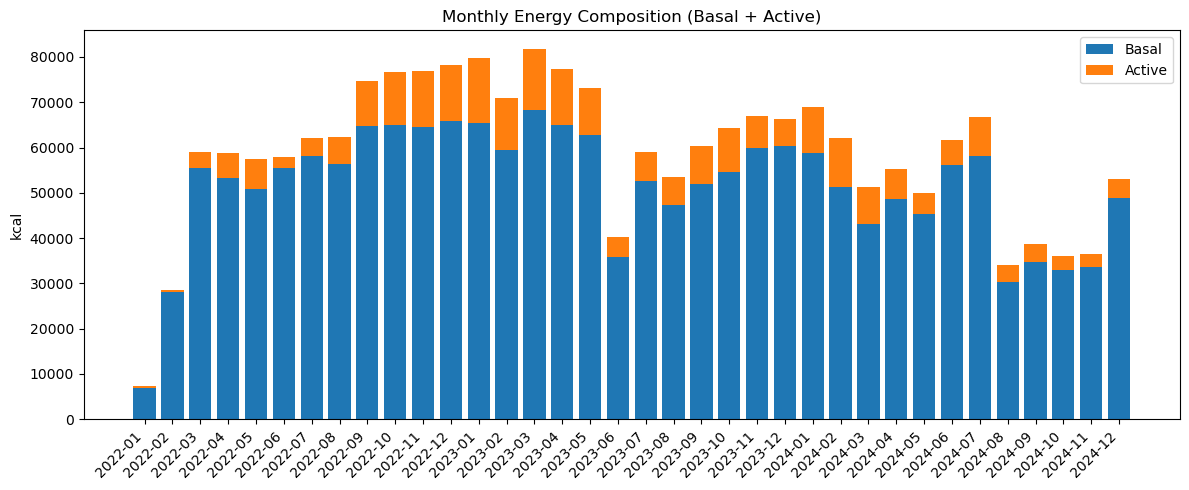

In [17]:
monthly_energy = (
    af.groupby("year_month")[["ActiveEnergyBurned","BasalEnergyBurned"]]
      .sum()
      .reset_index()
      .sort_values("year_month")
)

# Stacked bar (active over basal)
x = np.arange(len(monthly_energy))
active = monthly_energy["ActiveEnergyBurned"].values
basal = monthly_energy["BasalEnergyBurned"].values

plt.figure(figsize=(12,5))
plt.bar(x, basal, label="Basal")
plt.bar(x, active, bottom=basal, label="Active")
plt.xticks(x, monthly_energy["year_month"].astype(str), rotation=45, ha="right")
plt.title("Monthly Energy Composition (Basal + Active)")
plt.ylabel("kcal"); plt.legend()
plt.tight_layout(); plt.show()
